In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train = pd.read_csv('adult.data', names=columns, header=0, 
                    sep=',',na_values=['.', '??',' ?', '', ' ', 'NA', 'na', 'Na', 'N/A', 'N/a', 'n/a'])
test = pd.read_csv('adult.test', names=columns, skiprows=1, header=0, 
                    sep=',',na_values=['.', '??',' ?', '', ' ', 'NA', 'na', 'Na', 'N/A', 'N/a', 'n/a'])

In [3]:
df = pd.concat([train, test], axis=0)

In [5]:
# unique values in each columns
for attribute in df.columns:
    print("{} ".format(attribute))
    print("{}".format(df[attribute].unique()),"\n")
    
print('Shape of dataset: {}'.format(df.shape))

Age 
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 

Workclass 
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlgwt 
[ 83311 215646 234721 ... 173449  89686 350977] 

Education 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Education num 
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

Marital Status 
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Occupation 
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48840 entries, 0 to 16279
Data columns (total 15 columns):
Age               48840 non-null int64
Workclass         46041 non-null object
fnlgwt            48840 non-null int64
Education         48840 non-null object
Education num     48840 non-null int64
Marital Status    48840 non-null object
Occupation        46031 non-null object
Relationship      48840 non-null object
Race              48840 non-null object
Sex               48840 non-null object
Capital Gain      48840 non-null int64
Capital Loss      48840 non-null int64
Hours/Week        48840 non-null int64
Native country    47983 non-null object
Income            48840 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [7]:
df = df.replace(to_replace =" <=50K.", 
                 value =" <=50K") 
df = df.replace(to_replace =" >50K.", 
                 value =" >50K") 

df = df.drop(columns="fnlgwt")
df = df.drop(columns="Education num")
df = df.dropna()
df = df[df["Workclass"] != "0"]
print('Shape of dataset: {}'.format(df.shape))

dff=df


df['Income'] = df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

Shape of dataset: (45220, 13)


In [8]:
df.tail(30)

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
16247,25,Private,HS-grad,Divorced,Machine-op-inspct,Not-in-family,Black,Male,0,0,40,United-States,0
16248,31,Private,HS-grad,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
16249,49,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,Canada,1
16251,60,Private,Assoc-voc,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,1
16252,39,Private,Bachelors,Never-married,Tech-support,Not-in-family,White,Female,0,1669,40,United-States,0
16253,38,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
16254,43,Local-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,1
16255,23,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
16256,73,Self-emp-inc,Some-college,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0
16257,35,Private,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0


In [9]:
#################### Converting to int

df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

df.drop('Education', axis=1,inplace=True)

df.head()


,Age,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,50,0,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1945
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: Workclass, dtype: int64

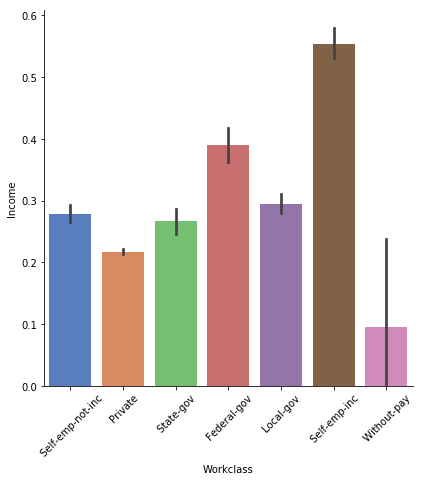

In [11]:
dff.fillna(' 0', inplace=True)

sn.factorplot(x="Workclass", y="Income", data=dff, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
dff['Workclass'].value_counts()

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


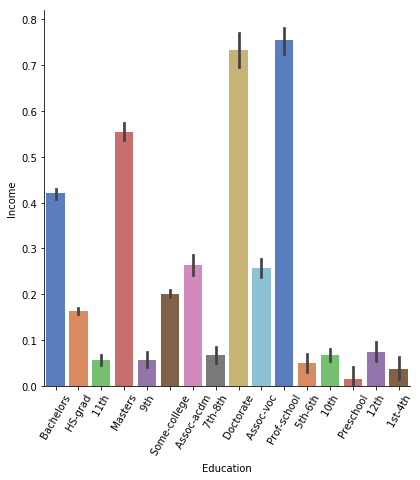

In [12]:
sn.factorplot(x="Education",y="Income",data=dff,kind="bar", size = 6, palette = "muted")
plt.xticks(rotation=60);

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


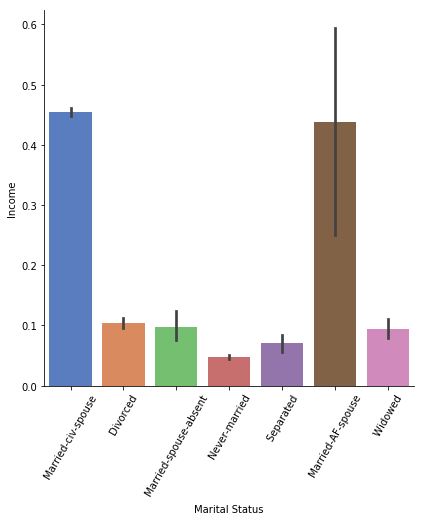

In [14]:
sn.factorplot(x="Marital Status",y="Income",data=dff,kind="bar", size = 6, palette = "muted")
plt.xticks(rotation=60);

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


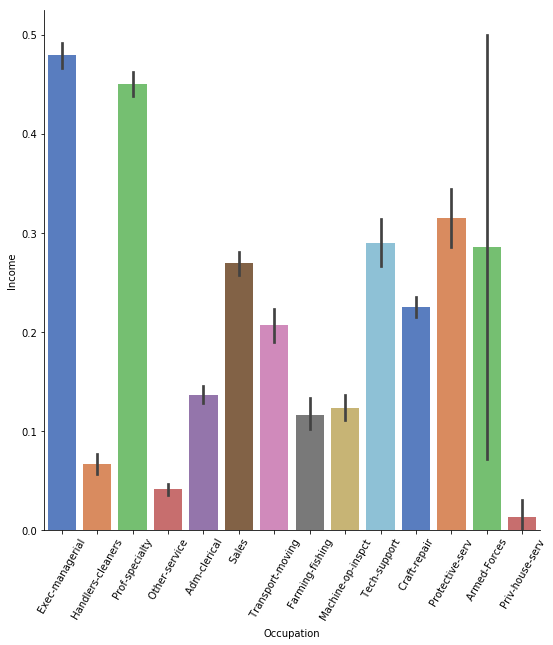

In [15]:
sn.factorplot(x="Occupation",y="Income",data=dff,kind="bar", size = 8, palette = "muted")
plt.xticks(rotation=60);

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


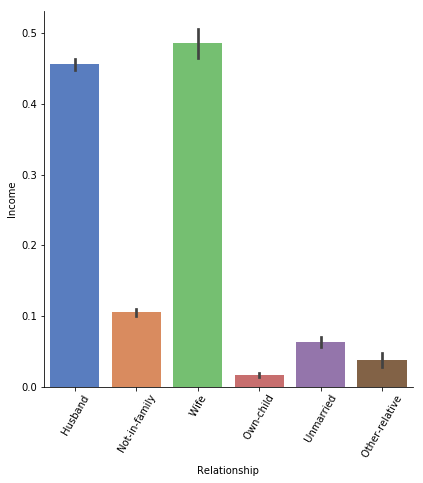

In [16]:
sn.factorplot(x="Relationship",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


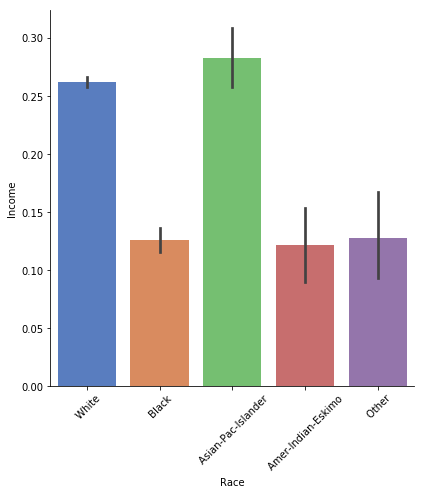

In [17]:
sn.factorplot(x="Race",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


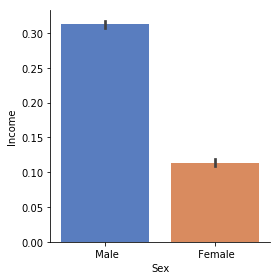

In [18]:
sn.factorplot(x="Sex",y="Income",data=dff,kind="bar", size = 4, 
palette = "muted");
              

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


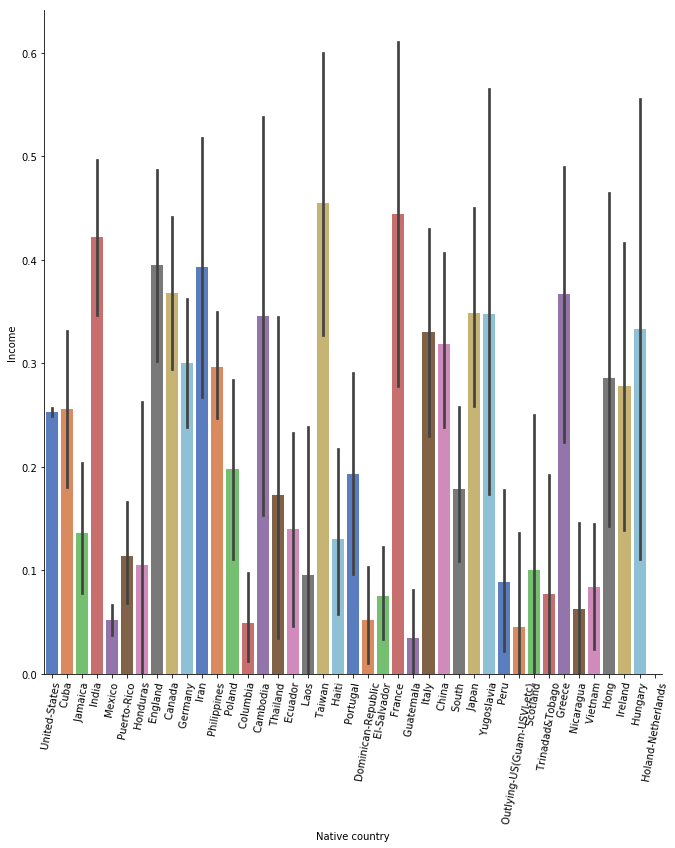

In [19]:
sn.factorplot(x="Native country",y="Income",data=dff,kind="bar", size = 10, 
palette = "muted")
plt.xticks(rotation=80);

In [20]:
X = np.array(df.drop(['Income'], 1))
y = np.array(df['Income'])
X = preprocessing.scale(X)
y = np.array(df['Income'])

#Splitting data as train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [21]:
########################################LINEAR REGRESSION#######################

from sklearn import linear_model
from sklearn.metrics import accuracy_score

modelAccuracy=[]
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_lmpre = lm.predict(X_test)

ylm = np.around(y_lmpre)

lm.score(X_train, y_train)
lm.coef_
lm.intercept_

##########Results

print(confusion_matrix(y_test,ylm))
print(classification_report(y_test,ylm))

LA = accuracy_score(y_test, ylm)
modelAccuracy.append(LA)
print("The Accuracy for Linear Regression is {}".format(LA))

[[6399  464    0]
 [1115 1050   16]
 [   0    0    0]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      6863
         1.0       0.69      0.48      0.57      2181
         2.0       0.00      0.00      0.00         0

   micro avg       0.82      0.82      0.82      9044
   macro avg       0.52      0.47      0.49      9044
weighted avg       0.81      0.82      0.81      9044

The Accuracy for Linear Regression is 0.8236399823087129


C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [22]:
################################ Decision tree ###########################################

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier( max_depth = 4 )

clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
modelAccuracy.append(DTA)
print("The Accuracy for Decision Tree Model is {}".format(DTA))

[[6677  186]
 [1370  811]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6863
           1       0.81      0.37      0.51      2181

   micro avg       0.83      0.83      0.83      9044
   macro avg       0.82      0.67      0.70      9044
weighted avg       0.83      0.83      0.80      9044

The Accuracy for Decision Tree Model is 0.8279522335249889


In [23]:
############### KNN ###############

from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)

##########Results

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
modelAccuracy.append(KKNA)
print("The Accuracy for KNN is {}".format(KKNA))

[[6206  657]
 [ 995 1186]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6863
           1       0.64      0.54      0.59      2181

   micro avg       0.82      0.82      0.82      9044
   macro avg       0.75      0.72      0.74      9044
weighted avg       0.81      0.82      0.81      9044

The Accuracy for KNN is 0.8173374613003096


In [24]:
#########LOGISTIC REGRESSION######################################################

from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

##########Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
modelAccuracy.append(LRA)
print("The Accuracy for Logistic Regression is {}".format(LRA))

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[4626 2237]
 [ 252 1929]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.79      6863
           1       0.46      0.88      0.61      2181

   micro avg       0.72      0.72      0.72      9044
   macro avg       0.71      0.78      0.70      9044
weighted avg       0.83      0.72      0.74      9044

The Accuracy for Logistic Regression is 0.7247899159663865


In [53]:
#L.remove(0.7167182662538699)
#print(L)
#alg = ['LINEAR REGRESSION', 'Decision tree','KNN','LOGISTIC REGRESSION', 'KMEANS']
alg = ['Linear', 'DT','KNN','Logistic', 'KMEANS']

[0.8236399823087129, 0.8279522335249889, 0.8173374613003096, 0.7247899159663865, 0.28328173374613]


In [47]:
########################### KMEANS ###################################

from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train) 
labels = k_means.labels_
centroids  = k_means.cluster_centers_.squeeze()
labelspre = k_means.predict(X_test)
print(confusion_matrix(y_test,labelspre))
print(classification_report(y_test,labelspre))
KmeanA = accuracy_score(y_test, labelspre)
#L.append(KmeanA)
print("The Accuracy for kmeans is {}".format(KmeanA))

[[4831 2032]
 [ 530 1651]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      6863
           1       0.45      0.76      0.56      2181

   micro avg       0.72      0.72      0.72      9044
   macro avg       0.67      0.73      0.68      9044
weighted avg       0.79      0.72      0.74      9044

The Accuracy for kmeans is 0.7167182662538699


[0.8236399823087129, 0.8279522335249889, 0.8173374613003096, 0.7247899159663865, 0.28328173374613]
['Linear', 'DT', 'KNN', 'Logistic', 'KMEANS']


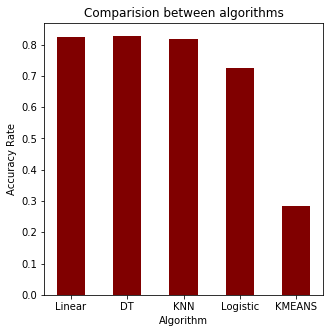

In [56]:

import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (5, 5)) 
#print(L)
#print(alg)
# creating the bar plot 
plt.bar(alg, modelAccuracy, color ='maroon', width = 0.5) 
  
plt.xlabel("Model") 
plt.ylabel("Accuracy Rate") 
plt.title("Comparision between Models") 
plt.show() 